<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

#### Make a dataset by using 'pandas'

In [187]:
import numpy as np
import pandas as pd

data = { 'x1': [0,0,1,0,1,1,0],
         'x2': [0,1,0,1,0,1,0],
         'x3': [1,1,1,0,0,1,0],
         'y':  [0,1,1,1,1,0,0]
       }
df = pd.DataFrame.from_dict(data).astype('int')

In [188]:
df

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1
5,1,1,1,0
6,0,0,0,0


In [189]:
X = df.drop(columns='y')
X.values

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 1],
       [0, 0, 0]])

In [190]:
y = df[['y']].values
y

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [252]:
# I want activations that correspond to negative weights to be lower
# and activations that correspond to positive weights to be higher

class NeuralNetwork: 
    
    def __init__(self):
    
    # Setup Arch   
        self.inputs = 3
        self.hiddenNodes = 4 
        self.outputNodes = 1
        
    # Initialize Weights
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        sx = self.sigmoid(s)
        return sx * (1-sx)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        """
        
    # Weight Sum
        self.hidden_sum = np.dot(X, self.weights1)
        
    # Activation
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
    # Weighted Sum 2
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
    # Final Output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X,y,o):
        """
        Backward propagate through the network
        """
        
        self.o_error = y - o # error in output
        
    # Apply derivative of sigmoid to error
        self.o_delta = self.o_error * self.sigmoidPrime(o) # o - self.output_sum
        
    # z2 error: how much were our output layer weights off
        self.z2_error = self.o_delta.dot(self.weights2.T)
        
    # z2 delta: how much were the weights off?
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.hidden_sum)

        self.weights1 += X.T.dot(self.z2_delta) # Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) # adjust second set (hidden => output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)


In [253]:
attributes = ['weights1', 'hidden_sum', 'activated_hidden', 'weights2', 'activated_output']
[print(i+'\n', getattr(nn,i), '\n'+'---'*3) for i in attributes if i[:2]!= '__'] 

weights1
 [[-1.11052697 -0.25879763  0.82543771  0.21364504]
 [-1.24465675 -1.96722055  0.32013288 -0.74122558]
 [-0.80676113 -0.09432717  0.82555248 -0.05195103]] 
---------
hidden_sum
 [[-0.80676113 -0.09432717  0.82555248 -0.05195103]
 [-2.05141789 -2.06154772  1.14568537 -0.79317661]
 [-1.9172881  -0.3531248   1.65099019  0.16169401]
 [-1.24465675 -1.96722055  0.32013288 -0.74122558]
 [-1.11052697 -0.25879763  0.82543771  0.21364504]
 [-3.16194486 -2.32034535  1.97112308 -0.57953157]
 [ 0.          0.          0.          0.        ]] 
---------
activated_hidden
 [[0.30858111 0.47643568 0.6954137  0.48701516]
 [0.11390919 0.11289074 0.75872195 0.311487  ]
 [0.12816428 0.41262487 0.83902483 0.54033566]
 [0.22362645 0.12268774 0.57935664 0.3227362 ]
 [0.24777266 0.4356593  0.69538939 0.55320902]
 [0.04062319 0.08945193 0.87773169 0.35904039]
 [0.5        0.5        0.5        0.5       ]] 
---------
weights2
 [[-0.78755629]
 [ 0.68267363]
 [ 0.99964857]
 [ 0.03367624]] 
---------
act

[None, None, None, None, None]

In [150]:
# nn = NeuralNetwork()

# nn.train(X,y)

In [254]:
# Train my 'net
nn = NeuralNetwork()

# Number of Epochs / Iterations
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
    x1  x2  x3
0   0   0   1
1   0   1   1
2   1   0   1
3   0   1   0
4   1   0   0
5   1   1   1
6   0   0   0
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.21479823]
 [0.30492032]
 [0.17616729]
 [0.26517579]
 [0.15421939]
 [0.2345612 ]
 [0.20966949]]
Loss: 
 0.36603801369149697
+---------EPOCH 2---------+
Input: 
    x1  x2  x3
0   0   0   1
1   0   1   1
2   1   0   1
3   0   1   0
4   1   0   0
5   1   1   1
6   0   0   0
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.33746172]
 [0.44552858]
 [0.3412255 ]
 [0.41168943]
 [0.32033745]
 [0.43585846]
 [0.33815262]]
Loss: 
 0.28109615825694473
+---------EPOCH 3---------+
Input: 
    x1  x2  x3
0   0   0   1
1   0   1   1
2   1   0   1
3   0   1   0
4   1   0   0
5   1   1   1
6   0   0   0
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.41270222]
 [0.52363826]
 [0.45210844]
 [0.50430861]
 [0.44308174]
 [0.555127

In [255]:
output = nn.feed_forward([0, 1, 1])
print("output", output)

output [0.99892518]


In [256]:
output_x = nn.feed_forward(X.values[1])
print("intput", X.values[1])
print('output_x', output_x)
print("true_output", y[1])

intput [0 1 1]
output_x [0.99892518]
true_output [1]


In [257]:
error = y[1] - output
error

array([0.00107482])

In [258]:
output_all = nn.feed_forward(X)
error_all = y - output_all
print(output_all)
print(error_all)

[[2.36373186e-05]
 [9.98925185e-01]
 [9.99007268e-01]
 [9.98935840e-01]
 [9.98962143e-01]
 [1.37865340e-03]
 [1.92135055e-03]]
[[-2.36373186e-05]
 [ 1.07481544e-03]
 [ 9.92732071e-04]
 [ 1.06415971e-03]
 [ 1.03785743e-03]
 [-1.37865340e-03]
 [-1.92135055e-03]]


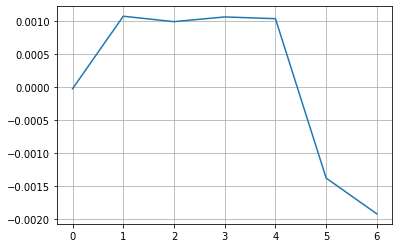

In [259]:
plt.grid(True)
plt.plot(error_all);

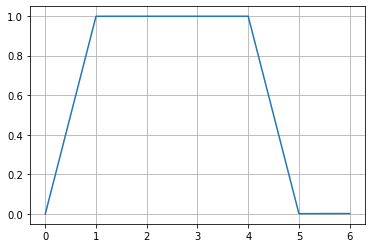

In [260]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.grid(True)
plt.plot(nn.feed_forward(X));

In [261]:
print("Predicted Output: \n" + str(nn.feed_forward(X)))
print("Loss: \n" + str(np.mean(np.square(y - nn.feed_forward(X))))) # mean sum squared loss

Predicted Output: 
[[2.36373186e-05]
 [9.98925185e-01]
 [9.99007268e-01]
 [9.98935840e-01]
 [9.98962143e-01]
 [1.37865340e-03]
 [1.92135055e-03]]
Loss: 
1.4204515690092178e-06


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [214]:
pip install keras

     |████████████████████████████████| 378kB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 51kB 12.5MB/s eta 0:00:01
     |████████████████████████████████| 51kB 14.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [216]:
pip install tensorflow

     |████████████████████████████████| 120.8MB 202kB/s eta 0:00:01
     |████████████████████████████████| 3.9MB 4.6MB/s eta 0:00:01
     |████████████████████████████████| 2.6MB 5.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 4.7MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 6.6MB/s eta 0:00:01
     |████████████████████████████████| 28.4MB 3.0MB/s eta 0:00:01    |██                              | 1.7MB 6.7MB/s eta 0:00:05
     |████████████████████████████████| 450kB 4.1MB/s eta 0:00:01
     |████████████████████████████████| 71kB 18.1MB/s eta 0:00:01
     |████████████████████████████████| 112kB 11.7MB/s eta 0:00:01
     |████████████████████████████████| 92kB 20.2MB/s eta 0:00:01
     |████████████████████████████████| 92kB 9.1MB/s  eta 0:00:01
     |████████████████████████████████| 163kB 9.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 19.5MB/s eta 0:00:01
     |████████████████████████████████| 153kB 5.3MB/s eta 0:00:01


  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=d9543a7bd2bace70ac1844924701faf7928ad80d70053bc32d3e41fa4af82659
  Stored in directory: /Users/ed/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4832 sha256=d37b1c89449438a83744f386d4c74a9abd9d85d4d8365795477f782cb9a60d7c
  Stored in directory: /Users/ed/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121932 sha256=760fcbe5485aece9742469898eaf281700cb7c12dda012eb4fa4c0d50c0f56b4
  Stored in directory: /Users/ed/Library/Caches/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
Successfully built gast termcolor absl-py
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
Note: you may need to restart

In [363]:
import keras
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [364]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Other way of loading the data

# from keras.datasets import mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [369]:
image_index = 55755 # You may select anything up to 60,000

Label number: 5


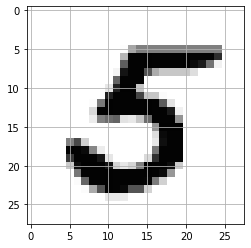

In [372]:
# %matplotlib inline # Only use this if using iPython

print('Label number:', y_train[image_index]) # The label is 5
plt.grid(True)
plt.imshow(x_train[image_index], cmap='Greys');

In [373]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

#### Reshaping and Normalizing the Image

In [374]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


##### We may experiment with any number for the first Dense layer; however, the final Dense layer must have 10 neurons since we have 10 number classes (0, 1, 2, …, 9). You may always experiment with kernel size, pool size, activation functions, dropout rate, and number of neurons in the first Dense layer to get a better result

In [375]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

##### Compiling and Fitting the Model

In [376]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
results = model.fit(x=x_train,y=y_train, epochs=10)
results

Epoch 1/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.2035 - accuracy: 0.9385
Epoch 2/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.0820 - accuracy: 0.9758
Epoch 3/10
60000/60000 [==============================] - 29s 487us/step - loss: 0.0561 - accuracy: 0.9822
Epoch 4/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.0434 - accuracy: 0.9862
Epoch 5/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0346 - accuracy: 0.9890
Epoch 6/10
60000/60000 [==============================] - 24s 392us/step - loss: 0.0282 - accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.0254 - accuracy: 0.9914
Epoch 8/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.0198 - accuracy: 0.9937
Epoch 9/10
60000/60000 [==============================] - 26s 429us/step - loss: 0.0197 - accuracy: 0.9931
Epoch 10/10
60000/60000 [============

In [377]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 100us/step


[0.06531352501548027, 0.9822999835014343]

In [378]:
image = x_test[751]
test_image = image.reshape((1,28,28,1))
image_predict = model.predict_classes(test_image)
number = image_predict[0]
print("Predicted Number: ", number)
# plt.imshow(test_image, cmap=plt.get_cmap('gray'));

Predicted Number:  5


Predicted number: 5


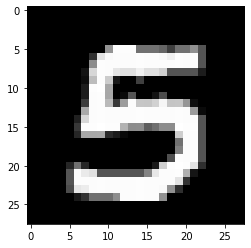

In [379]:
print('Predicted number:', number)
plt.imshow(x_test[751].reshape(28,28), cmap=plt.get_cmap('gray'));

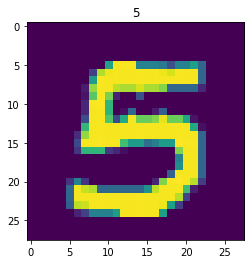

In [380]:
# Predicted number

image = image.reshape((28,28))
plt.imshow(image)
plt.title(number)
plt.show()

Predicted number: 8


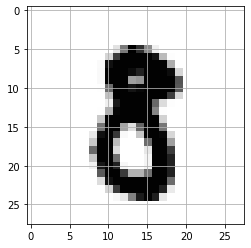

In [381]:
image_index = 3987
plt.grid(True)
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Predicted number:', pred.argmax())

In [386]:
results.history.keys()

dict_keys(['loss', 'accuracy'])

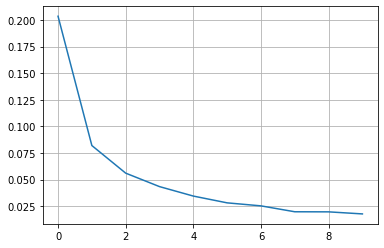

In [405]:
plt.grid(True)
plt.plot(results.history['loss']);

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?